In [651]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split,GridSearchCV


In [652]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv(r"C:\Users\NIRA\Machine Learning\Data\sample_submission.csv")

In [653]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [654]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [655]:
submission.head()

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight


**Features related with the physical condition **

    Age
    Gender
    Height
    Weight
    SCC: Calories consumption monitoring,
    FAF: Physical activity frequency
    TUE: Time using technology devices
    MTRANS: Transportation used
**Features related with the eating habits **

    CAEC: Frequency of consumption of food between meals 
    CH2O: Consumption of water in liters per day
    CALC: Frequency of alcohol consumption
    FAVC: Frequency of consumption of high caloric food
    FCVC: Frequency of consumption of vegetables
    NCP: Number of main meals per day

In [656]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [657]:
train.duplicated().sum()

0

In [658]:
train.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [659]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [660]:
cat_col=train.select_dtypes(include=object)
dig_col=train.select_dtypes(exclude=object)


In [661]:
# print(train['SMOKE'].unique())
# print(train['CALC'].unique())
# print(train['MTRANS'].unique())
# print(train['TUE'].unique())
# print(train['NObeyesdad'].unique())

for i in cat_col:
    print(f'{i} : {train[i].unique()} : {len(train[i].unique())}')


Gender : ['Male' 'Female'] : 2
family_history_with_overweight : ['yes' 'no'] : 2
FAVC : ['yes' 'no'] : 2
CAEC : ['Sometimes' 'Frequently' 'no' 'Always'] : 4
SMOKE : ['no' 'yes'] : 2
SCC : ['no' 'yes'] : 2
CALC : ['Sometimes' 'no' 'Frequently'] : 3
MTRANS : ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike'] : 5
NObeyesdad : ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I'] : 7


In [662]:
train= train.drop("id", axis=1)

In [663]:
train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [664]:
dig_col.dtypes


id          int64
Age       float64
Height    float64
Weight    float64
FCVC      float64
NCP       float64
CH2O      float64
FAF       float64
TUE       float64
dtype: object

In [665]:
#train.set_index('id',inplace=True)
# train=train.drop('id',axis=1,inplace=True)

## Analysis of Categorical Variables

In [666]:
def cat_analysis(data,cat_data):
    print(pd.DataFrame({cat_data:data[cat_data].value_counts(),"Ratio":data[cat_data].value_counts()*100/len(data)}),end= "\n")


In [667]:
for col in cat_col:
    cat_analysis(train,col)
# for col in cat_cols:
#     cat_analysis(train,col)

        Gender      Ratio
Gender                   
Female   10422  50.207149
Male     10336  49.792851
                                family_history_with_overweight     Ratio
family_history_with_overweight                                          
yes                                                      17014  81.96358
no                                                        3744  18.03642
       FAVC      Ratio
FAVC                  
yes   18982  91.444262
no     1776   8.555738
             CAEC      Ratio
CAEC                        
Sometimes   17529  84.444551
Frequently   2472  11.908662
Always        478   2.302727
no            279   1.344060
       SMOKE      Ratio
SMOKE                  
no     20513  98.819732
yes      245   1.180268
       SCC      Ratio
SCC                  
no   20071  96.690433
yes    687   3.309567
             CALC      Ratio
CALC                        
Sometimes   15066  72.579247
no           5163  24.872338
Frequently    529   2.548415
         

In [668]:
# for column in numerical_features.columns[1:]:
#     sns.histplot(data = train , x =column, color = '#3498db' , kde = True , bins = 30 )
#     plt.show()

##  Data Visualization

In [669]:
# # Plotting histograms for numerical features
# fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# for i in range(len(dig_col)):
#     plt.subplot(2,4,i+1)
#     sns.distplot(train[dig_col[i]])
#     title = 'Distribution : ' + numerical_features[i]
#     plt.title(title)
    

# plt.show()


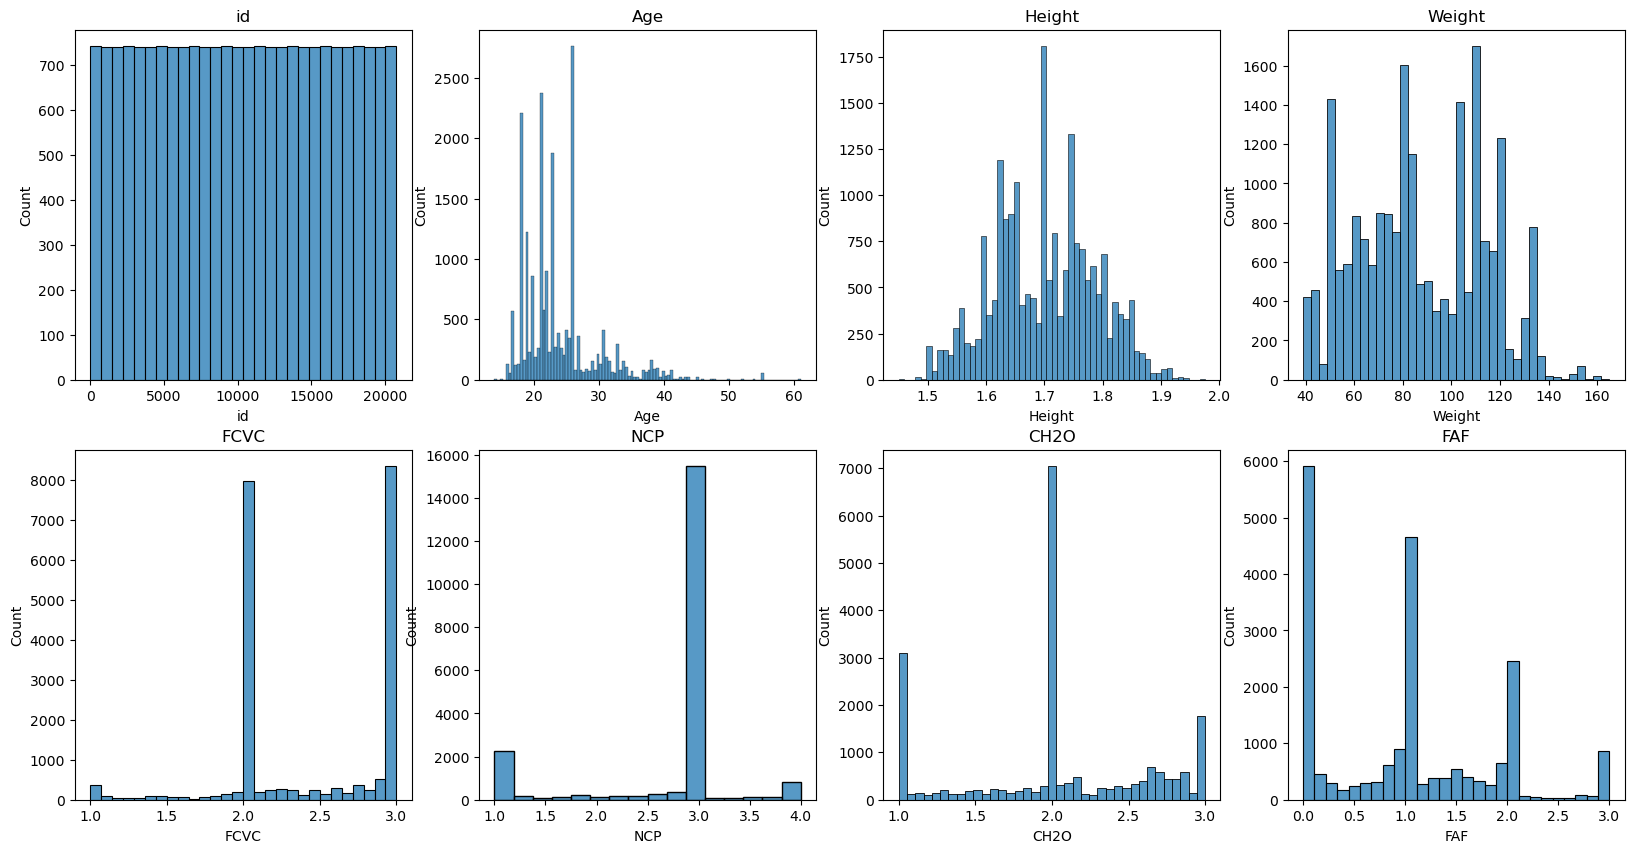

In [670]:
# Plotting histograms for numerical features
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for i, ax in enumerate(axs.flat):
    column_name = dig_col.columns[i]
    sns.histplot(data=dig_col, x=column_name, ax=ax)
    ax.set_title(column_name)
    ax.set_ylabel('Count')



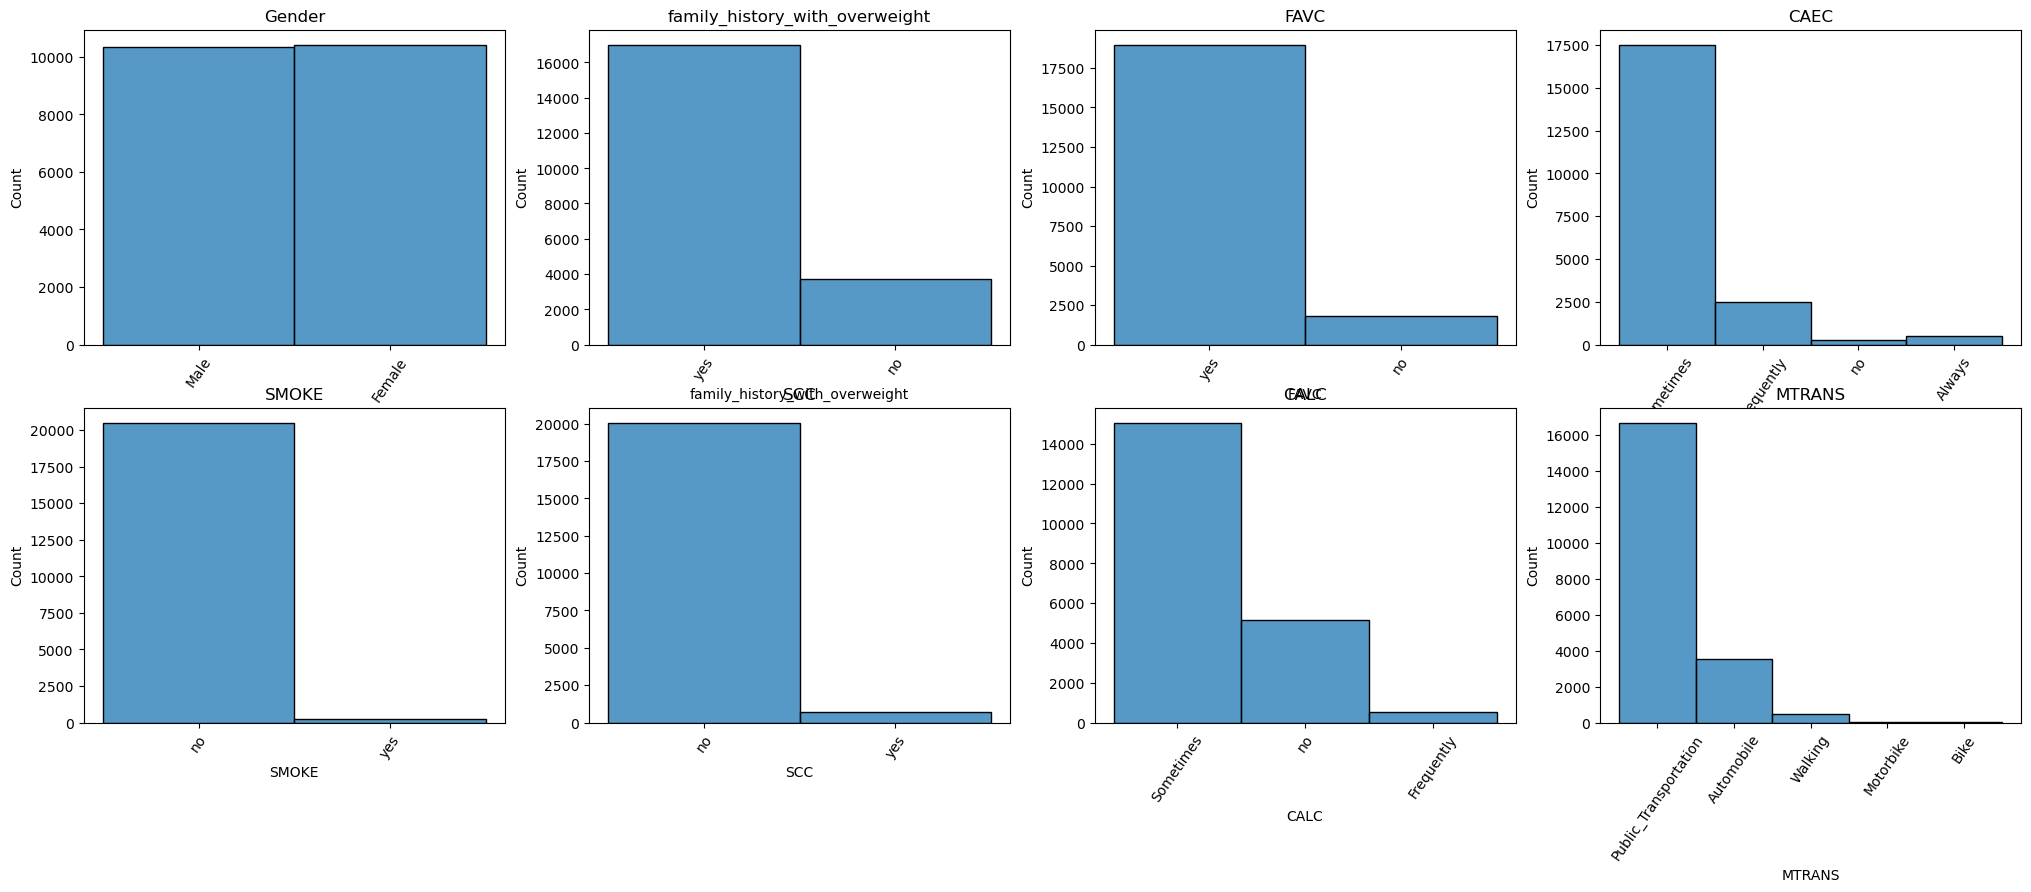

In [671]:
fig, axs = plt.subplots(2, 4, figsize=(25, 9))
for i ,ax in enumerate(axs.flat):
    column_name=cat_col.columns[i]
    sns.histplot(data=cat_col, x=column_name, ax=ax)
    ax.set_title(column_name)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=55)



In [672]:
def plot_boxplot(dataframe, column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe, x=column_name)
    plt.title(f'Boxplot of {column_name}')
    plt.show()

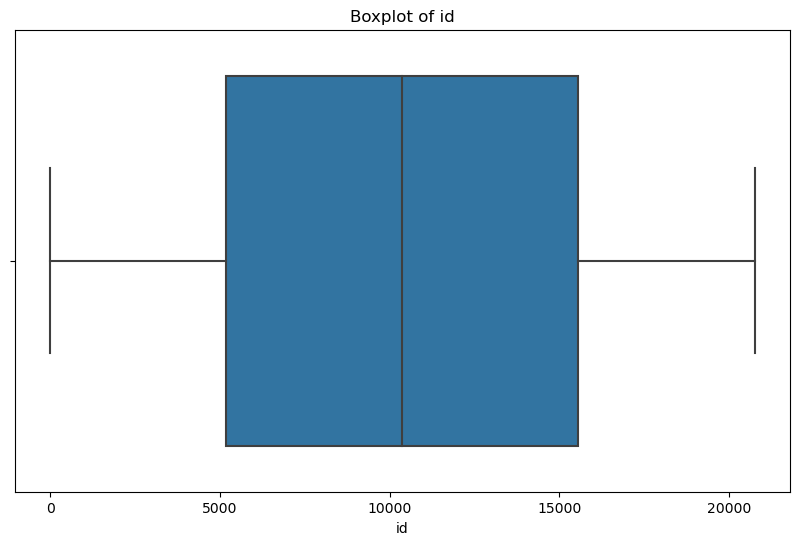

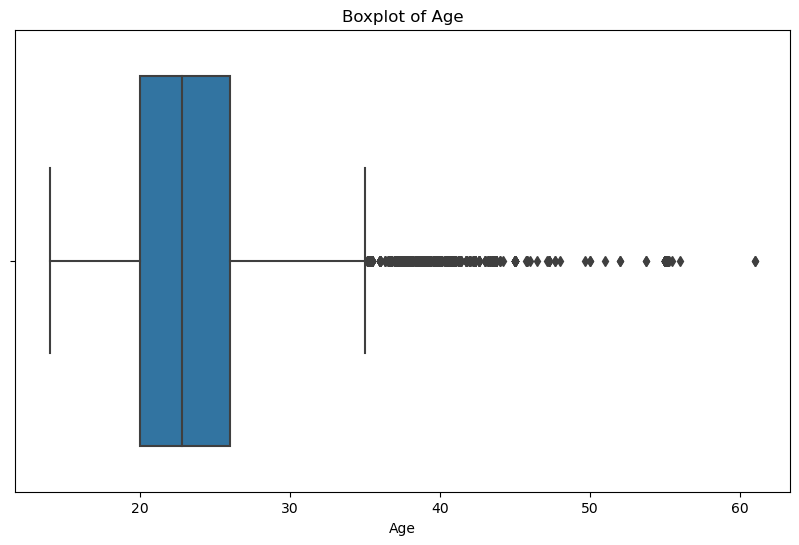

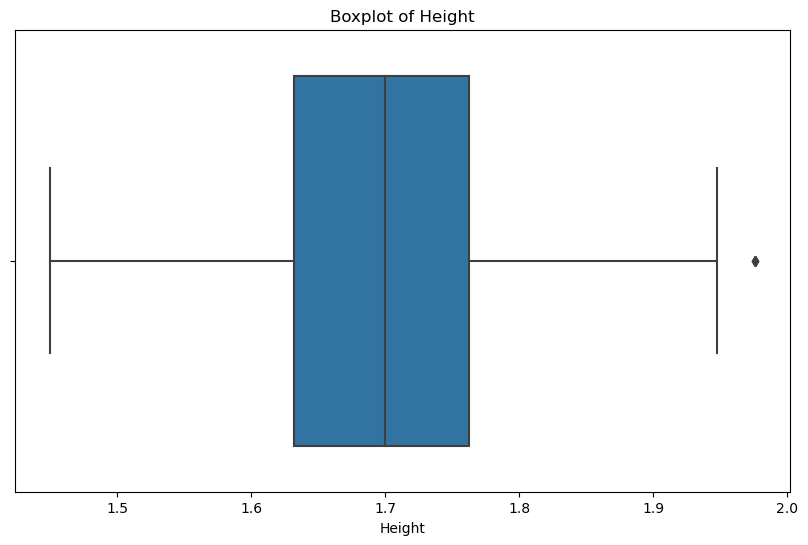

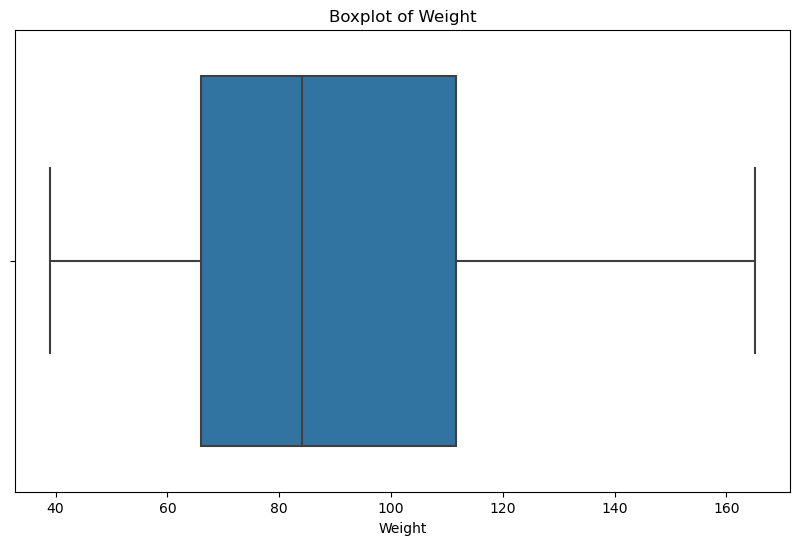

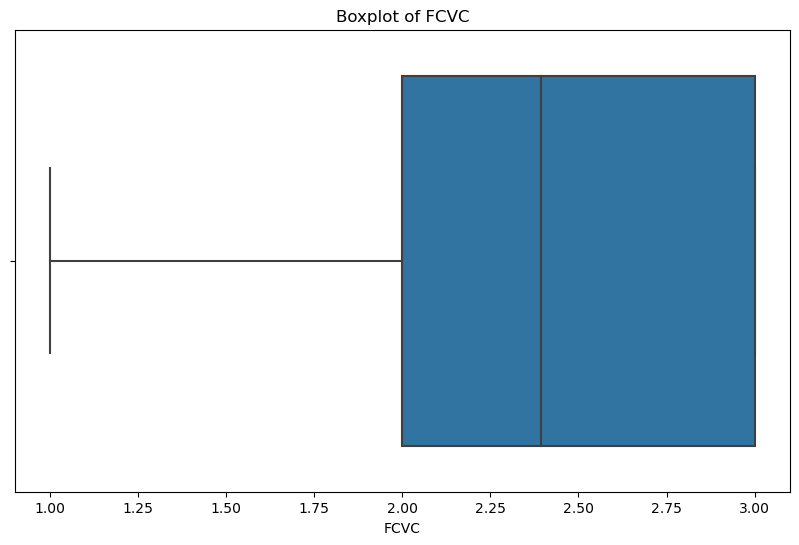

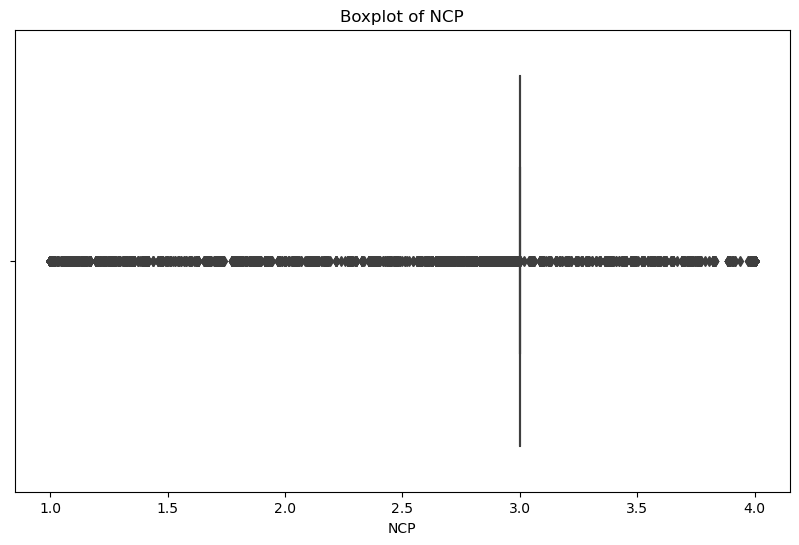

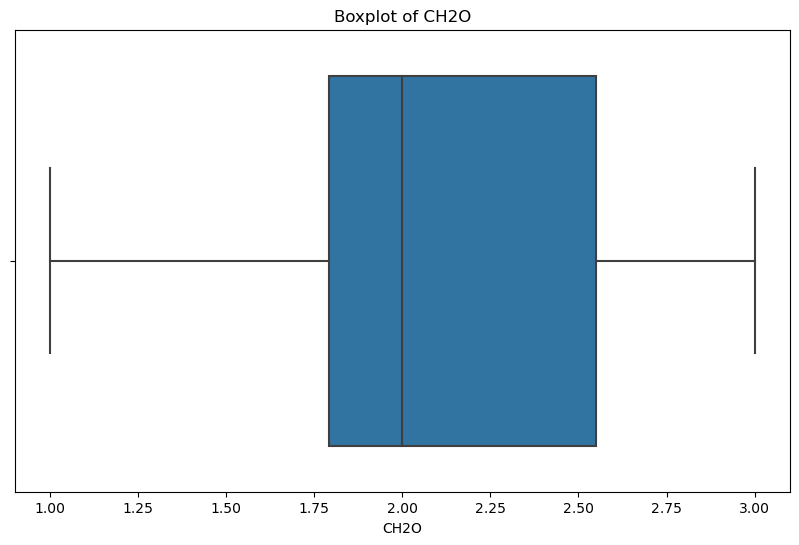

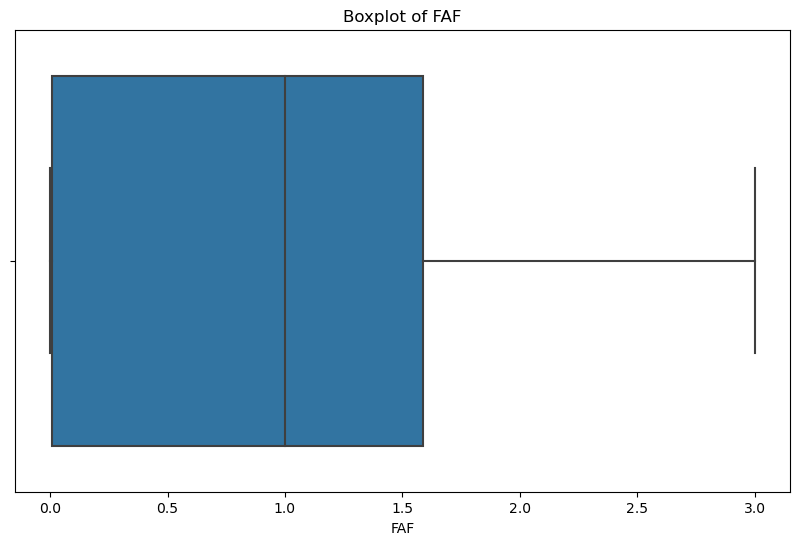

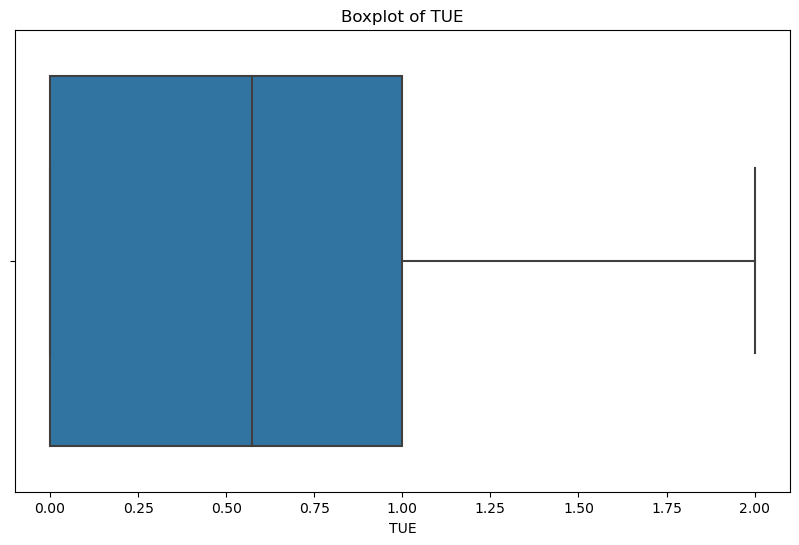

In [673]:
for i in dig_col.columns:
    plot_boxplot(dig_col,i)

In [674]:
target=train['NObeyesdad'].value_counts()
target


NObeyesdad
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

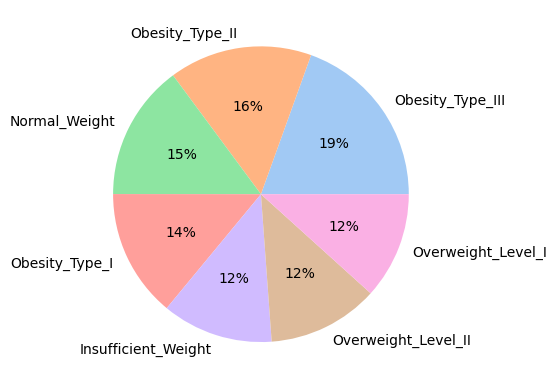

In [675]:
colors = sns.color_palette('pastel')
plt.pie(x=target,autopct='%.0f%%',labels=target.index,colors=sns.color_palette('pastel'))
plt.show()

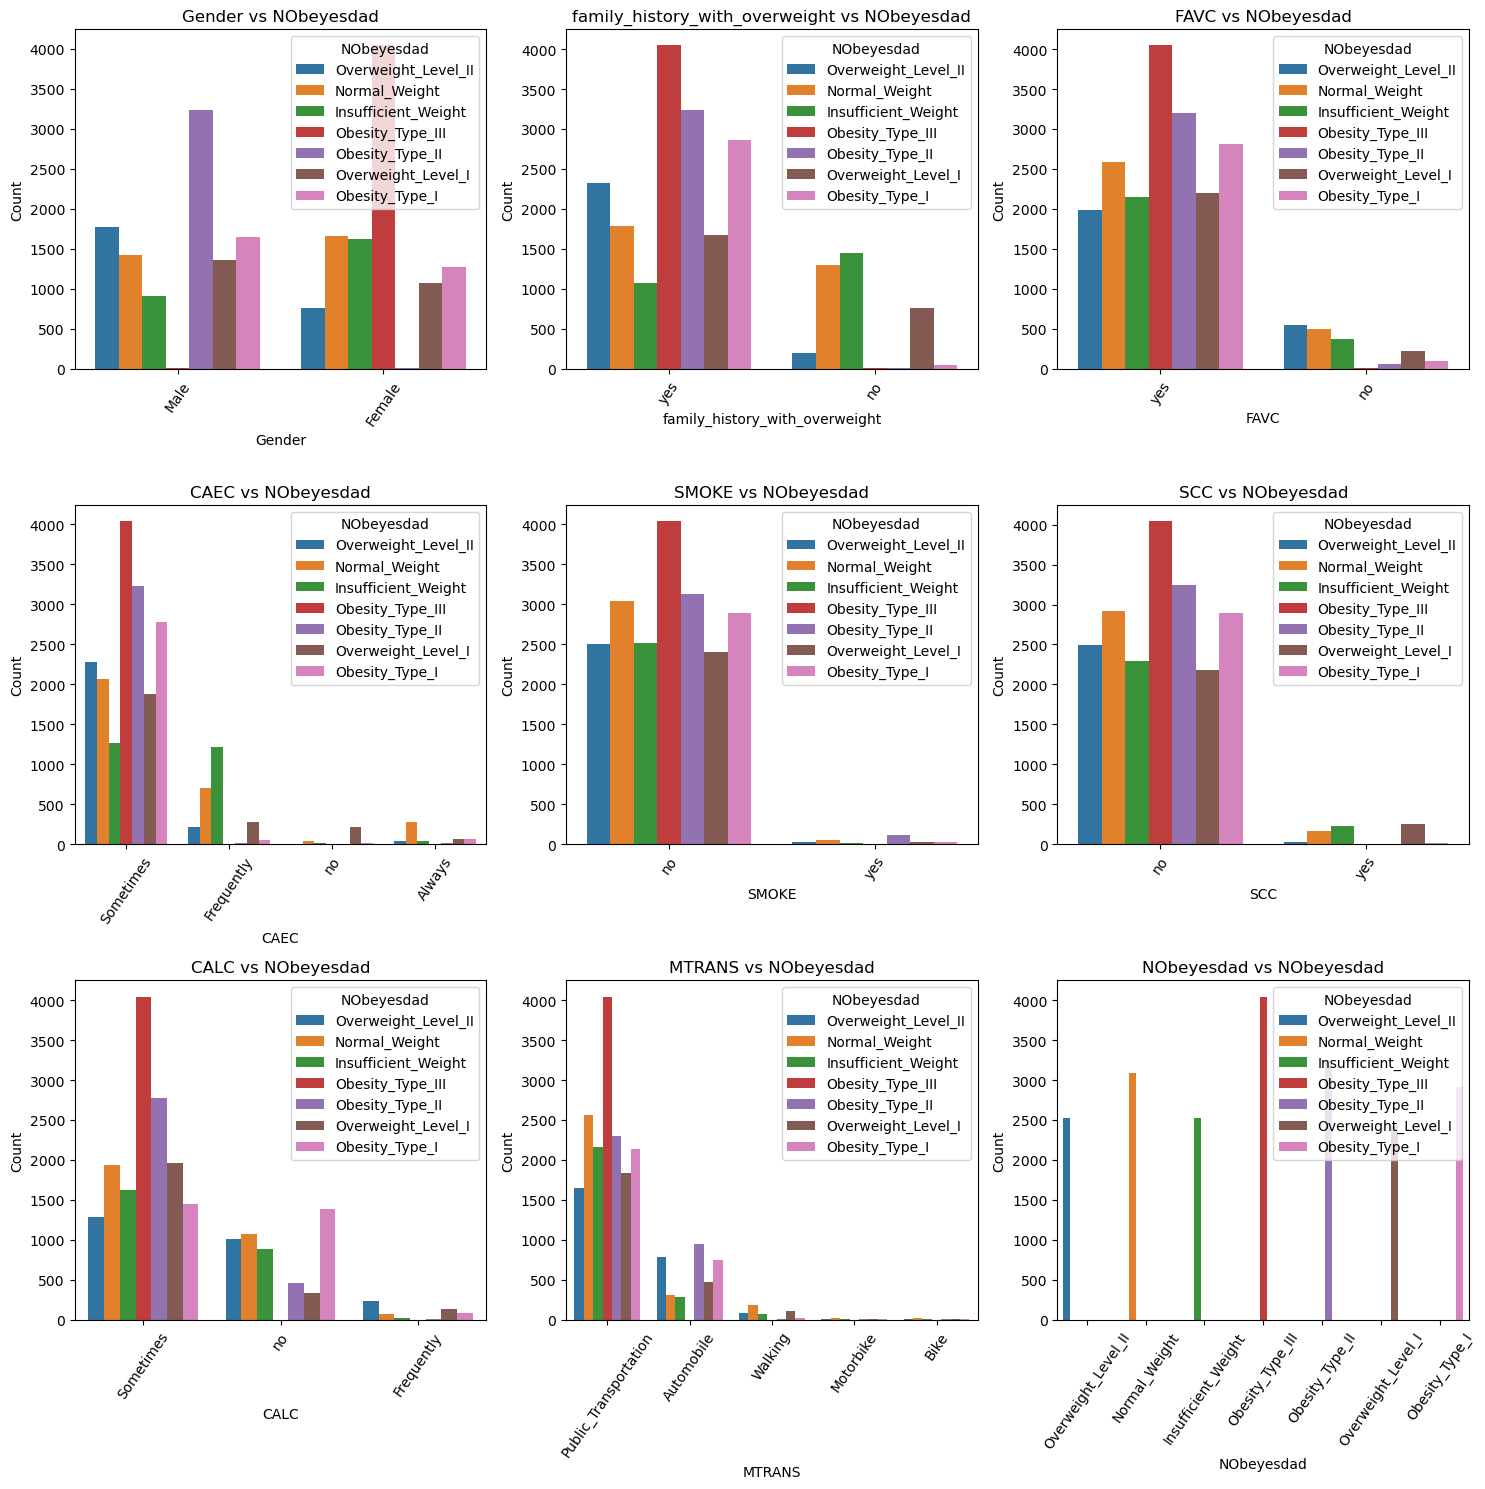

In [676]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i ,col in enumerate(cat_col):
    sns.countplot(x=col,hue='NObeyesdad',data=train,ax=axes[i])
    axes[i].set_title(f'{col} vs NObeyesdad')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=55)

plt.tight_layout()
plt.show()

<Axes: >

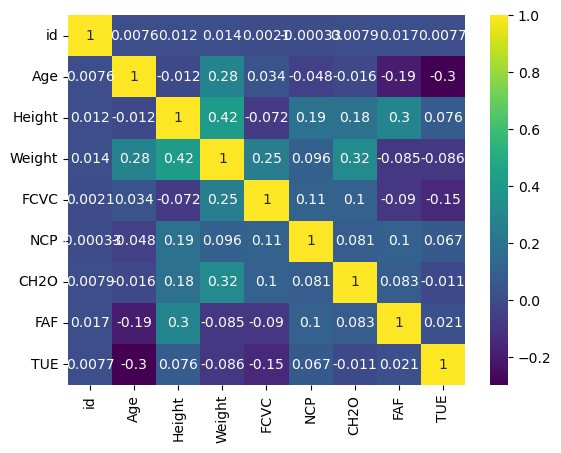

In [677]:
correlation=dig_col.corr()
sns.heatmap(correlation ,annot=True ,cmap='viridis')


C:\Users\NIRA\AppData\Local\Temp\ipykernel_32744\4015924691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_untransformed = sns.distplot(train['Age'])


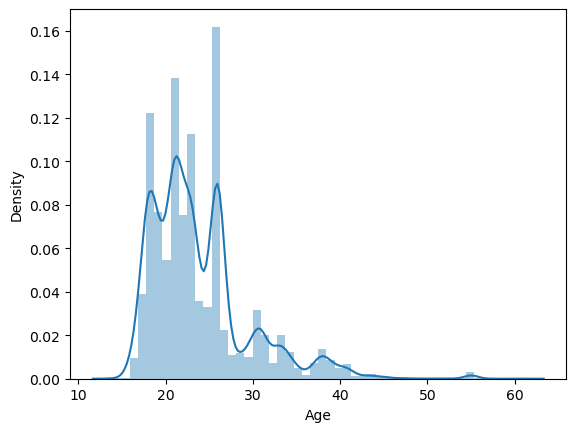

In [678]:
sp_untransformed = sns.distplot(train['Age'])

C:\Users\NIRA\AppData\Local\Temp\ipykernel_32744\2323141488.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_untransformed = sns.distplot(train['Weight'])


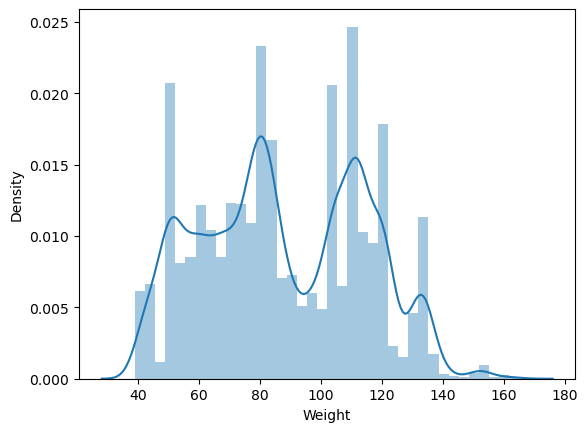

In [679]:
sp_untransformed = sns.distplot(train['Weight'])

C:\Users\NIRA\AppData\Local\Temp\ipykernel_32744\1915735603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sp_untransformed = sns.distplot(train['FCVC'])


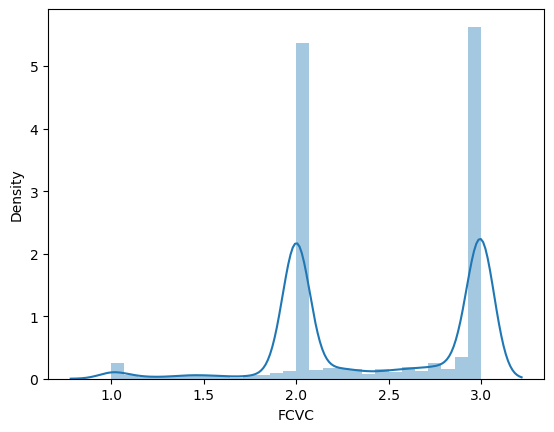

In [680]:
sp_untransformed = sns.distplot(train['FCVC'])

In [681]:
dig_col.skew()

id        0.000000
Age       1.586252
Height    0.015803
Weight    0.093187
FCVC     -0.356611
NCP      -1.562253
CH2O     -0.212506
FAF       0.505726
TUE       0.670411
dtype: float64

**The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5;
moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; 
and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.7, so it is considered highly skewed data.**

## Summary:
    Age : A positive skewness indicates that the age distribution is skewed to the right. 
    Weight: Slightly positive skewness suggests a small number of individuals may be heavier than the average.
    FCVC : Negative skewness indicates that the data is skewed to the left, meaning more individuals have higher frequencies 
           of vegetable consumption.
    NCP : A significantly negative skewness implies a distribution that is skewed to the left. This could mean that more      
          individuals have fewer main meals than the average or the mode.
    CH2O : Negative skewness suggests that the data is skewed left, indicating that most individuals in the dataset likely  
          drink water at or above the average amount.
    FAF : A moderately positive skew indicates a distribution with a tail towards higher 
         values, meaning there might be a significant number of individuals who engage in physical activity less frequently.
    TUE : Positive skewness here suggests that the distribution has a right tail, indicating that a significant portion of 
          individuals spend less time on electronic devices.

## prepare test Data


In [682]:
test.duplicated().sum()


0

In [683]:
test.isna().sum()


id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [684]:
test.describe().T


,count,mean,std,min,25%,50%,75%,max
id,13840.0,27677.500000,3995.408198,20758.00,24217.750000,27677.500000,31137.250000,34597.000000
Age,13840.0,23.952740,5.799814,14.00,20.000000,22.906342,26.000000,61.000000
Height,13840.0,1.698934,0.088761,1.45,1.631662,1.700000,1.760710,1.980000
Weight,13840.0,87.384504,26.111819,39.00,65.000000,83.952968,111.157811,165.057269
FCVC,13840.0,2.442898,0.531606,1.00,2.000000,2.358087,3.000000,3.000000
NCP,13840.0,2.750610,0.710927,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,13840.0,2.032044,0.611230,1.00,1.771781,2.000000,2.552388,3.000000
FAF,13840.0,0.974532,0.840361,0.00,0.001086,1.000000,1.571865,3.000000
TUE,13840.0,0.611033,0.608005,0.00,0.000000,0.552498,1.000000,2.000000


In [685]:
# test.set_index('id',inplace=True)
test=test.drop("id", axis=1)


In [686]:
cat_col_test=test.select_dtypes(include=object)
dig_col_test=test.select_dtypes(exclude=object)

In [687]:
for i in cat_col_test :
    print(f'{i} : {test[i].unique()} : {len(test[i].unique())}')


Gender : ['Male' 'Female'] : 2
family_history_with_overweight : ['yes' 'no'] : 2
FAVC : ['yes' 'no'] : 2
CAEC : ['Sometimes' 'Always' 'Frequently' 'no'] : 4
SMOKE : ['no' 'yes'] : 2
SCC : ['no' 'yes'] : 2
CALC : ['Sometimes' 'no' 'Frequently' 'Always'] : 4
MTRANS : ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike'] : 5


In [688]:
dig_col.columns

Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

### Body Mass Index is a simple calculation using a person’s height and weight. The formula is BMI = kg/m2 where kg is a person’s weight in kilograms and m2 is their height in metres squared. 

In [689]:
train['BMI'] = train['Weight'] / (train['Height'] ** 2)
test['BMI'] = test['Weight'] / (test['Height'] ** 2)


<Axes: xlabel='BMI', ylabel='Count'>

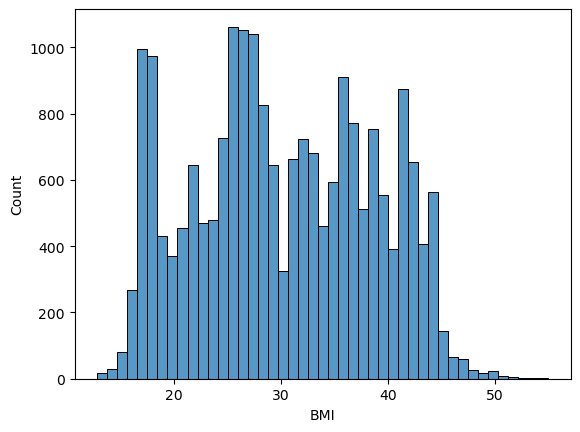

In [690]:
sns.histplot(train['BMI'])

    f your BMI is less than 18.5, it falls within the underweight range.
    If your BMI is 18.5 to <25, it falls within the healthy weight range.
    If your BMI is 25.0 to <30, it falls within the overweight range.
    If your BMI is 30.0 or higher, it falls within the obesity range.¶
    Obesity is frequently subdivided into categories:
    Class 1: BMI of 30 to < 35
    Class 2: BMI of 35 to < 40
    Class 3: BMI of 40 or higher. Class 3 obesity is sometimes categorized as “severe” obesity

# preprocessing

**Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.**

In [691]:
from sklearn.preprocessing import OrdinalEncoder 

target_labels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                      'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

y_train = train["NObeyesdad"]
#### Ordinal Encoder encodes the data based on his order not the provided order
ord_enc = OrdinalEncoder(categories=[target_labels])
# ord_enc = OrdinalEncoder()
y_train_ = ord_enc.fit_transform(y_train.array.reshape(-1, 1))
ord_enc.categories_

# y_train = train["NObeyesdad"].map({'Normal_Weight':0,'Insufficient_Weight':1,'Overweight_Level_I':2 ,'Overweight_Level_II':3,'Obesity_Type_I':4 ,'Obesity_Type_II':5
#                                   ,'Obesity_Type_III':6})

[array(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
        'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
        'Obesity_Type_III'], dtype=object)]

In [692]:
train.drop('NObeyesdad',axis=1,inplace=True)

In [693]:
num_cols = train.select_dtypes(exclude=['object']).columns
cat_cols = train.select_dtypes(include=['object']).columns

num_cols_test = test.select_dtypes(exclude=['object']).columns
cat_cols_test = test.select_dtypes(include=['object']).columns


In [694]:
print(cat_cols)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [695]:
# train_encoded =pd.get_dummies(train,drop_first=True, columns=cat_cols).astype(int)
# test_encoded = pd.get_dummies(test,drop_first=True, columns=cat_cols_test).astype(int)
# print(train_encoded)


In [696]:
# cattest_data=test[cat_cols_test]

# oh = OneHotEncoder()
# encoded_data = oh.fit_transform(cattest_data)

# column_names = oh.get_feature_names_out(cat_cols_test)

# train_encoded = pd.DataFrame(encoded_data.toarray(), columns=column_names)
# print(train_encoded)
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary').set_output(transform='pandas')
train_encoded= ohe.fit_transform(train[cat_cols])
train_encoded.head()

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [697]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='if_binary').set_output(transform='pandas')
test_incoded= ohe.fit_transform(test[cat_cols_test])
test_encoded.head(5)

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,26,1,120,2,3,2,0,0,35,1,...,0,0,0,0,1,0,0,0,1,0
1,21,1,66,2,1,3,1,0,25,0,...,0,0,0,0,1,0,0,0,1,0
2,26,1,111,3,3,2,0,0,41,0,...,0,0,0,0,1,0,0,0,1,0
3,20,1,103,2,2,2,0,0,42,1,...,0,0,0,0,1,0,0,0,1,0
4,26,1,104,3,3,2,0,0,39,0,...,0,0,0,0,1,0,0,0,1,0


In [698]:
# train['Gender'] = train['Gender'].map({'Female':0, 'Male':1})
# train['SMOKE'] = train['SMOKE'].map({'no':0, 'yes':1})
# train['SCC'] = train['SCC'].map({'no':0, 'yes':1})
# train['CALC'] = train['CALC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
# train['FAVC'] = train['FAVC'].map({'no':0, 'yes':1})
# train['family_history_with_overweight'] = train['family_history_with_overweight'].map({'no':0, 'yes':1})
# train['CAEC'] = train['CAEC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
# train['MTRANS'] = train['MTRANS'].map({'Bike':0,'Walking':1,'Motorbike':2,'Public_Transportation':3,'Automobile':4})

In [699]:
# test['Gender'] = test['Gender'].map({'Female':0, 'Male':1})
# test['SMOKE'] = test['SMOKE'].map({'no':0, 'yes':1})
# test['SCC'] = test['SCC'].map({'no':0, 'yes':1})
# test['CALC'] = test['CALC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
# test['FAVC'] = test['FAVC'].map({'no':0, 'yes':1})
# test['family_history_with_overweight'] = test['family_history_with_overweight'].map({'no':0, 'yes':1})
# test['CAEC'] = test['CAEC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
# test['MTRANS'] = test['MTRANS'].map({'Bike':0,'Walking':1,'Motorbike':2,'Public_Transportation':3,'Automobile':4})

In [700]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()

# train_scaled=pd.DataFrame(mms.fit_transform(train[num_cols]), columns=num_cols)

# test_scaled=pd.DataFrame(mms.transform(train[num_cols_test]), columns=num_cols_test)


train[num_cols]=pd.DataFrame(mms.fit_transform(train[num_cols]), columns=num_cols)

test[num_cols_test]=pd.DataFrame(mms.transform(test[num_cols_test]), columns=num_cols_test)


In [701]:
# outputfile = 'obesity_processed.csv'
# train_scaled.to_csv(outputfile, index=False)

In [702]:
from sklearn.model_selection import train_test_split
X=train_encoded
y=y_train 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X.shape,y.shape)

(20758, 17) (20758,)


In [1178]:
from sklearn.svm import SVC

In [1179]:
model=SVC(random_state=42)


In [1180]:
model.fit(X_train,y_train)

SVC(random_state=42)

In [1181]:
y_pred_svm = model.predict(X_test)

In [1182]:
pd.DataFrame({"y_pred":y_pred_svm,"y":y_test})

,y_pred,y
10317,6,6
4074,2,2
9060,3,4
11286,5,5
8254,1,1
...,...,...
12190,6,6
473,5,5
17068,1,1
19567,4,4


In [1183]:
from sklearn.metrics import accuracy_score,classification_report

In [1184]:
print("svm:",accuracy_score(y_pred_svm,y_test))

svm: 0.8233782915863841


In [1185]:
model1=SVC()

In [1186]:
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

In [1187]:
# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model,param_grid = params_grid)
# Search the best parameters with training data
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [1188]:
best_params

{'C': 100, 'kernel': 'rbf'}

In [1189]:
best_model=SVC(C=100, kernel='rbf',random_state=42)


In [1190]:
best_model.fit(X_train,y_train)

SVC(C=100, random_state=42)

In [1192]:
# y_pred_svm = best_model.predict(test_encoded)

In [1193]:
y_pred_svm = best_model.predict(X_test)

In [1194]:
pd.DataFrame({"y_pred":y_pred_svm,"y":y_test})

,y_pred,y
10317,6,6
4074,2,2
9060,4,4
11286,5,5
8254,1,1
...,...,...
12190,6,6
473,5,5
17068,1,1
19567,4,4


In [1202]:
print("svm:",accuracy_score(y_pred_svm,y_test))

svm: 0.8742774566473989


In [55]:
# submission['NObeyesdad']=y_pred_svm

In [1196]:
label_mapping = {
    'Normal_Weight': 0,
    'Insufficient_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}


In [1197]:
inverse_label_mapping = {v: k for k, v in label_mapping.items()}

In [1198]:
y_pred_labels = [inverse_label_mapping[i] for i in y_pred_svm]
y_test_labels=[inverse_label_mapping[i] for i in y_test]

In [1199]:
pd.DataFrame({"y_pred":y_pred_labels,"y":y_test_labels})

,y_pred,y
0,Obesity_Type_III,Obesity_Type_III
1,Overweight_Level_I,Overweight_Level_I
2,Obesity_Type_I,Obesity_Type_I
3,Obesity_Type_II,Obesity_Type_II
4,Insufficient_Weight,Insufficient_Weight
...,...,...
6223,Obesity_Type_III,Obesity_Type_III
6224,Obesity_Type_II,Obesity_Type_II
6225,Insufficient_Weight,Insufficient_Weight
6226,Obesity_Type_I,Obesity_Type_I


In [703]:
# y_pred_svm = best_model.predict(test_encoded)

In [704]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [705]:
knn = KNeighborsClassifier()

In [706]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [707]:
X_train = X_train.values
X_test= X_test.values

In [708]:
y_pred_knn = knn.predict(X_test)

C:\Users\NIRA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [709]:
print(classification_report(y_test, y_pred_knn))

                     precision    recall  f1-score   support

Insufficient_Weight       0.49      0.59      0.54       755
      Normal_Weight       0.44      0.34      0.39       907
     Obesity_Type_I       0.47      0.53      0.50       858
    Obesity_Type_II       0.62      0.28      0.39      1005
   Obesity_Type_III       0.80      1.00      0.89      1207
 Overweight_Level_I       0.18      0.36      0.24       733
Overweight_Level_II       0.41      0.14      0.21       763

           accuracy                           0.49      6228
          macro avg       0.49      0.46      0.45      6228
       weighted avg       0.52      0.49      0.48      6228



In [710]:
print("svm:",accuracy_score( y_pred_knn,y_test))

svm: 0.49277456647398843


In [711]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 10],
                  'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [712]:
best_n_neighbors_knn = grid_search_knn.best_params_['n_neighbors']
best_weights_knn = grid_search_knn.best_params_['weights']

In [713]:
print(best_n_neighbors_knn )
print(best_weights_knn )

7
uniform


In [714]:
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors_knn,weights=best_weights_knn)
knn_best.fit(X_train, y_train)
y_pred_knn_best =knn_best.predict(X_test)

print("Evaluation Metrics (K-Nearest Neighbors)")
print(classification_report(y_test, y_pred_knn_best))

Evaluation Metrics (K-Nearest Neighbors)
                     precision    recall  f1-score   support

Insufficient_Weight       0.54      0.56      0.55       755
      Normal_Weight       0.43      0.35      0.38       907
     Obesity_Type_I       0.47      0.54      0.50       858
    Obesity_Type_II       0.53      0.84      0.65      1005
   Obesity_Type_III       0.80      1.00      0.89      1207
 Overweight_Level_I       0.49      0.17      0.25       733
Overweight_Level_II       0.48      0.25      0.33       763

           accuracy                           0.57      6228
          macro avg       0.53      0.53      0.51      6228
       weighted avg       0.55      0.57      0.54      6228



In [715]:
test_encoded

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,26,1,120,2,3,2,0,0,35,1,...,0,0,0,0,1,0,0,0,1,0
1,21,1,66,2,1,3,1,0,25,0,...,0,0,0,0,1,0,0,0,1,0
2,26,1,111,3,3,2,0,0,41,0,...,0,0,0,0,1,0,0,0,1,0
3,20,1,103,2,2,2,0,0,42,1,...,0,0,0,0,1,0,0,0,1,0
4,26,1,104,3,3,2,0,0,39,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,23,1,78,2,3,1,0,0,26,1,...,0,0,0,0,1,0,0,0,1,0
13836,29,1,62,3,3,2,0,0,24,0,...,0,0,0,0,1,0,0,0,1,0
13837,22,1,44,3,2,2,1,1,17,0,...,0,0,0,0,1,0,0,0,1,0
13838,21,1,53,2,3,2,3,2,20,1,...,0,0,0,0,0,1,0,0,1,0


In [716]:
predict=knn.predict(test_encoded.values)

C:\Users\NIRA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 24 features, but KNeighborsClassifier is expecting 17 features as input.

In [ ]:
submission=pd.DataFrame({"id":test['id'],"NObeyesdad":predict})